## This notebook shows bivariate plotting with pandas

This is done as part of the "learn" part on kaggle

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

/home/adrian/anaconda3/envs/testEnvironment/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/adrian/anaconda3/envs/testEnvironment/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
reviews = pd.read_csv('winemag-data_first150k.csv', index_col = 0)

In [5]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Bivariate plotting with scatter plots and hex plots with pandas

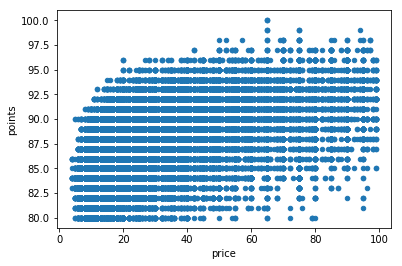

In [6]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

#### The plot above shows the weakness of scatter plots. Having lots of data points that are equal makes them overwrite each other, and it is not very readable. This can be solved by for example sampling the data

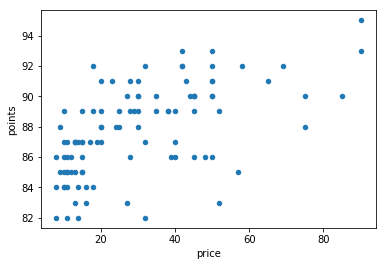

In [7]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

#### Hex plots are good where scatter plots are bad. The color says something about the frequency about that specific value, and gives an intuitive way of interpreting this. THe plot below shows that there is some correlation between high price and points, as the ones with high price are only awarded with high points

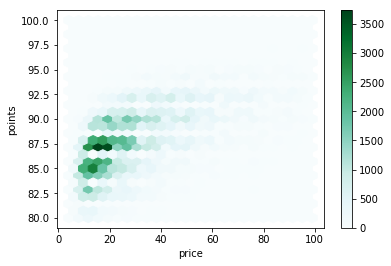

In [15]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=25)

In [16]:
pokemon = pd.read_csv('Pokemon.csv', index_col = 0)

In [17]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


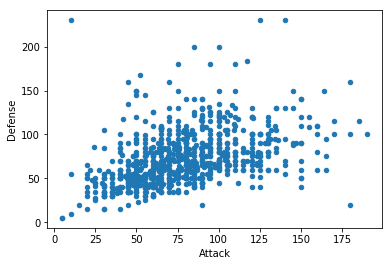

In [19]:
pokemon.plot.scatter(x='Attack', y='Defense')

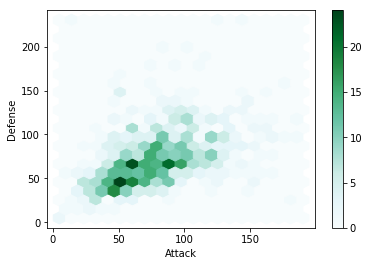

In [20]:
pokemon.plot.hexbin(x='Attack', y='Defense', gridsize=20)

In [21]:
pokemon_stats_legendary = pokemon.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]

In [22]:
pokemon_stats_legendary

Attack     Defense
Legendary Generation                        
False     1            74.981250   70.175000
          2            70.693069   72.118812
          3            76.971831   69.901408
          4            79.620370   75.074074
          5            78.246667   70.486667
          6            70.459459   74.013514
True      1           120.833333   89.166667
          2            99.000000   99.000000
          3           118.333333  107.222222
          4           109.846154  103.538462
          5           120.266667   90.733333
          6           125.250000  101.375000

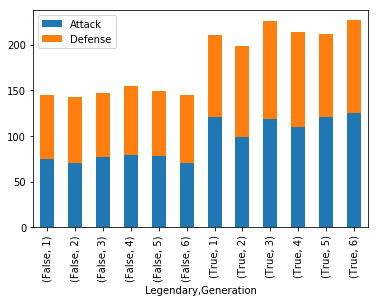

In [23]:
pokemon_stats_legendary.plot.bar(stacked=True)

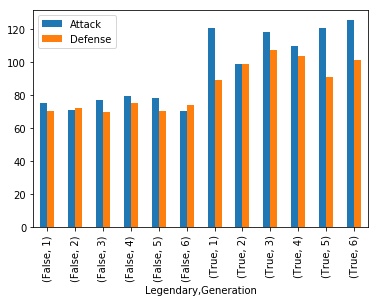

In [24]:
pokemon_stats_legendary.plot.bar()